# YouTube trending videos
Przedmiot: Projekt Eksploracji Danych<br>
Grupa:
* Kajetan Zimniak, 127229
* Bartosz Górka, 127228


## Wczytywanie danych
Projekt zakłada wykorzystanie repozytorium na platformie GitHub i synchronizację plików stanowiących zbiór danych

In [0]:
!git clone --branch feature/textual_attributes https://github.com/bartoszgorka/youtube-trending-videos.git

fatal: destination path 'youtube-trending-videos' already exists and is not an empty directory.


In [0]:
DATA = "youtube-trending-videos/youtube_data"

Sprawdzenie danych przechowywanych w folderze `DATA` (referencja na wcześniej pobrane repozytorium). W wyniku powinniśmy otrzymać listę następujących plików:
* `GB_category_id.json`
* `GB_videos_5p.csv`
* `US_category_id.json`
* `US_videos_5p.csv`

In [0]:
!ls $DATA

GB_category_id.json  GB_videos_5p.csv  US_category_id.json  US_videos_5p.csv


## Import
Import używanych przez program paczek dla języka Python

In [0]:
import os 
import json
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.apionly as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Przygotowanie danych pod analizę
Wykorzystujemy `pandas` aby móc efektywnie przeszukiwać nasz zbiór danych zapisany w postaci `DataFrame`

Dane dotyczące kategorii również zostały zaprezentowane w postaci `DataFrame` (normalizacja z oryginalej postaci pliku `JSON`) aby móc ujednolicić wykorzystanie danych.

W przypadku kolumny `description` wymagane było dodatkowe skorygowanie jej nazwy (w pierwotnej występowały nadmiarowe spacje).



In [0]:
def read_and_parse_video_data(name):
    df = pd.read_csv(os.path.join(DATA, name), encoding='ISO-8859-1', sep=';')
    df.rename(inplace = True, columns = lambda x: x.strip())
    df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
    df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    df['category_id'] = df['category_id'].astype(str)
    return df

# --------------------------------- GB FILES ---------------------------------
with open(os.path.join(DATA, 'GB_category_id.json')) as json_file:
    GB_category_id = pd.io.json.json_normalize(data = json.load(json_file)['items'])

GB_videos_5p = read_and_parse_video_data('GB_videos_5p.csv')

# --------------------------------- US FILES ---------------------------------
with open(os.path.join(DATA, 'US_category_id.json')) as json_file:
    US_category_id = pd.io.json.json_normalize(data = json.load(json_file)['items'])

US_videos_5p = read_and_parse_video_data('US_videos_5p.csv')

Sprawdzimy teraz, jak prezentuje się ogólna struktura danych dla `GB`

In [27]:
def describe(df, name):
    print(name)
    print(df.info())
    print(df.describe())

describe(GB_category_id, 'GB_category_id')
describe(GB_videos_5p, 'GB_videos_5p')

GB_category_id
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
kind                  31 non-null object
etag                  31 non-null object
id                    31 non-null object
snippet.channelId     31 non-null object
snippet.title         31 non-null object
snippet.assignable    31 non-null bool
dtypes: bool(1), object(5)
memory usage: 1.4+ KB
None
                         kind  ... snippet.assignable
count                      31  ...                 31
unique                      1  ...                  2
top     youtube#videoCategory  ...              False
freq                       31  ...                 17

[4 rows x 6 columns]
GB_videos_5p
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null datetime64[ns]
title                     38916 non-null object
channel_title      

Jak możemy zaobserwować, w naszym zbiorze dla `GB` znajduje się 38916 przykładów. W przypadku 38304 mamy dostępny opis.

Sprawdzimy teraz co zawierają w sobie przykłady bez wskazanego opisu.

In [0]:
GB_videos_5p[GB_videos_5p['description'].apply(lambda x: pd.isna(x))]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
91,_wM_jY_rass,17.14.11,Bone on Labour HQ,Ross Kempsell,NaN,2017-11-06T16:12:58.000Z,[none],159065,1160,1164,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN
118,8HON4AswPVk,17.14.11,Arvo PÃ¤rt - Tabula Rasa,JSaxofone,NaN,2012-09-13T12:35:46.000Z,"Arvo|""PÃ¤rt""|""Tabula""|""Rasa""|""part""|""violin""|""...",728177,4007,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN
187,j5AILysDDTI,17.14.11,Brad Bufanda Demo Reel,EinsteinEnt,NaN,2010-09-02T20:48:37.000Z,Brad Bufanda (Film Actor),154054,16,10,19,https://i.ytimg.com/vi/j5AILysDDTI/default.jpg,False,False,False,NaN
309,_wM_jY_rass,17.15.11,Bone on Labour HQ,Ross Kempsell,NaN,2017-11-06T16:12:58.000Z,[none],160381,1168,1170,0,https://i.ytimg.com/vi/_wM_jY_rass/default.jpg,True,False,False,NaN
336,8HON4AswPVk,17.15.11,Arvo PÃ¤rt - Tabula Rasa,JSaxofone,NaN,2012-09-13T12:35:46.000Z,"Arvo|""PÃ¤rt""|""Tabula""|""Rasa""|""part""|""violin""|""...",729358,4016,71,240,https://i.ytimg.com/vi/8HON4AswPVk/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38511,H08xgoXkpa8,18.12.06,Snoop Dogg Weighs In On Kanye's Controversial ...,The View,NaN,2018-05-24T15:49:26.000Z,"Snoop Dogg|""Kanye West""|""slavery""|""race""|""love...",939527,10918,1666,2959,https://i.ytimg.com/vi/H08xgoXkpa8/default.jpg,False,False,False,NaN
38560,vjSohj-Iclc,18.12.06,"Getting some air, Atlas?",BostonDynamics,NaN,2018-05-10T19:56:28.000Z,"Dynamic robots|""Boston Dynamics""|""humanoid rob...",6781236,86991,3143,13586,https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg,False,False,False,NaN
38639,JXZG_Qcm6Nw,18.13.06,Sheldon makes a friend and invites him for din...,kunal gawade,NaN,2018-06-06T06:34:07.000Z,"#Youngsheldon|""#youngsheldon""|""#sheldon""|""#jim...",368022,2303,109,222,https://i.ytimg.com/vi/JXZG_Qcm6Nw/default.jpg,False,False,False,NaN
38735,vjSohj-Iclc,18.13.06,"Getting some air, Atlas?",BostonDynamics,NaN,2018-05-10T19:56:28.000Z,"Dynamic robots|""Boston Dynamics""|""humanoid rob...",6791996,87079,3145,13591,https://i.ytimg.com/vi/vjSohj-Iclc/default.jpg,False,False,False,NaN


Postanowiliśmy zastąpić wartość pustą w opisach wartością `""` tj. pustym ciągiem znaków. Taki zabieg pozwali nam na zachowanie przykładów.

In [0]:
GB_videos_5p['description'] = GB_videos_5p['description'].fillna(value='')

Również dla danych z `US` podjęto podobną analizę.

In [0]:
describe(US_category_id, 'US_category_id')
describe(US_videos_5p, 'US_videos_5p')

US_category_id
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
kind                  32 non-null object
etag                  32 non-null object
id                    32 non-null object
snippet.channelId     32 non-null object
snippet.title         32 non-null object
snippet.assignable    32 non-null bool
dtypes: bool(1), object(5)
memory usage: 1.4+ KB
None
                         kind  ... snippet.assignable
count                      32  ...                 32
unique                      1  ...                  2
top     youtube#videoCategory  ...              False
freq                       32  ...                 17

[4 rows x 6 columns]
US_videos_5p
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             4

In [0]:
US_videos_5p['description'] = US_videos_5p['description'].fillna(value='')

W dalszej analizie przeprowadzimy połączenie obu zbiorów danych z zaznaczeniem skąd pochodzą przykłady. Taka informacja może się nam przydać dla dalszego wnioskowania. Może występować sytuacja, że dla Wielkiej Brytanii zalecimy inną strategię, niż w przypadku Stanów Zjednoczonych.

In [0]:
US_videos_5p['country_code'] = 'US'
GB_videos_5p['country_code'] = 'GB'
content = pd.concat([GB_videos_5p, US_videos_5p])

# Etap 1 - Atrybuty tekstowe
Wstępne statystyki danych, wykorzystanie metod wizualizacji, zapoznanie się z danymi oraz ich jakością; identyfikacja braków
* Zmiana reprezentacji danych: atrybuty oparte na opisie, tytule i ewentualnie innych atrybutach (bez obrazków)
    * Występowanie słów (jakie słowa są szczególnie informatywne dla naszego problemu?)
    * Atrybuty oparte na tytułach i opisach: długość, interpunkcja, wielkie litery, obecność linków itp.
    * Czas uploadu do YouTube
    * Jakie atrybuty da się wykorzystać? Jakich nie? Dlaczego?
* OCENA (15%)
    * 5% podsumowanie danych, wstępne statystyki
    * 5% atrybuty tekstowe (semantyka)
    * 5% atrybuty tekstowe (meta)

Do naszego zbioru wprowadzimy parę nowych atrybutów, które być może będą dobrym wyznacznikiem postępowania.

Rozpoczniemy od stosunku liczby polubień i wskazania braku akceptacji w stosunku do liczby wyświetleń. Do tego skupimy się także na komentarzach. Wykorzystując te dane możemy wnioskować o reakcji odbiorców na materiał video.

In [0]:
content['likes_per_view'] = content['likes'] / content['views']
content['dislikes_per_views'] = content['dislikes'] / content['views']

content['likes_dislikes_ratio'] = content['likes'] / content['dislikes']

content['comments_per_view'] = content['comment_count'] / content['views']
content['reactions_per_view'] = (content['likes'] + content['dislikes']) / content['views']
content['all_reactions_per_view'] = (content['likes'] + content['dislikes'] + content['comment_count']) / content['views']

Po przygotowaniu reakcji skupimy się na danych czasowych. W przypadku wskazania `trending date` mamy dostęp wyłącznie do daty bez godziny (tego dnia zaobserwowano obecność video na liście "gorących tematów").

Bardziej przydatne w naszym przypadku może być rozdzielenie daty i godziny publikacji na dwa atrybuty. Intuicja podpowiada, że najprawdopodobniej warto publikować w godzinach aktywności odbiorców. Pozwala to osiągnąć dużą oglądalność już chwilę po publikacji, co może być nagradzane przez algorytm wybierający materiały video na listę trending.

In [0]:
content['published_at_date'] = content['publish_time'].dt.date
content['published_at_time'] = content['publish_time'].dt.time

Dokonując analizy danych nie sposób nie wskazać pewnych oczekiwanych, brakujących danych. W naszym przypadku doszliśmy do wniosku o możliwym pozytywnym wpływie danych w postaci:
*   Długość materiału video przesłanego przez użytkownika. Spodziewamy się, że materiały mające długość w zakresie od 3 do 10 min powinny dominować w zbiorze trending videos.
*  Data publikacji a sezonowość. W przypadku świąt jak chociażby Święta Bożego Narodzenia lub Święto Dziękczynienia w USA, video nawiązujące do wskazanego tematu najprawdopodobniej będą dominować zbiór trending videos. Na to przekłada się również sezonowość użytych tagów.


---
# TUTAJ MAM KONIEC

In [0]:
# Basic analysis All

# GB_videos_5p
print('GB_videos_5p\n')
print('number of attributes: ', len(GB_videos_5p.columns))
print('attributes names: ', GB_videos_5p.columns)
for n in GB_videos_5p.columns:
  print('not empty attribute', n, '[%]:', 100 * len(GB_videos_5p[GB_videos_5p[n].notnull()]) / len(GB_videos_5p))
print(GB_videos_5p.describe())

# US_videos_5p
print('\n\nUS_videos_5p\n')
print('number of attributes: ', len(US_videos_5p.columns))
print('attributes names: ', US_videos_5p.columns)
for n in US_videos_5p.columns:
  print('not empty attribute', n, '[%]:', 100 * len(US_videos_5p[US_videos_5p[n].notnull()]) / len(US_videos_5p))
print(US_videos_5p.describe())

GB_videos_5p

number of attributes:  17
attributes names:  Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country_code'],
      dtype='object')
not empty attribute video_id [%]: 100.0
not empty attribute trending_date [%]: 100.0
not empty attribute title [%]: 100.0
not empty attribute channel_title [%]: 100.0
not empty attribute category_id [%]: 4.913146263747559
not empty attribute publish_time [%]: 100.0
not empty attribute tags [%]: 100.0
not empty attribute views [%]: 100.0
not empty attribute likes [%]: 100.0
not empty attribute dislikes [%]: 100.0
not empty attribute comment_count [%]: 100.0
not empty attribute thumbnail_link [%]: 100.0
not empty attribute comments_disabled [%]: 100.0
not empty attribute ratings_disabled [%]: 100.0
not empty attribute video_err

GB_videos_5p less than 1 million views: 50.36488847774694
US_videos_5p less than 1 million views: 60.09426359618062
LIKES:


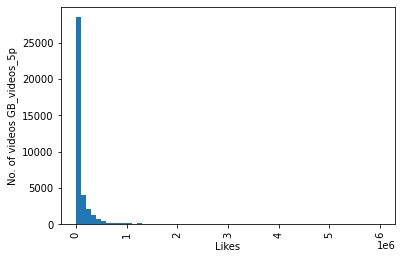

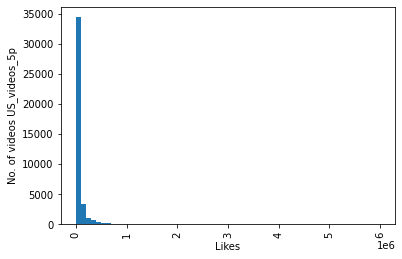

In [0]:
print('GB_videos_5p less than 1 million views:', GB_videos_5p[GB_videos_5p['views'] < 1e6]['views'].count() / GB_videos_5p['views'].count() * 100)
print('US_videos_5p less than 1 million views:', US_videos_5p[US_videos_5p['views'] < 1e6]['views'].count() / US_videos_5p['views'].count() * 100)

# GB_videos_5p
print('LIKES:')
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(GB_videos_5p["likes"], kde=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos GB_videos_5p")
_ = plt.xticks(rotation=90)

# US_videos_5p
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(US_videos_5p["likes"], kde=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos US_videos_5p")
_ = plt.xticks(rotation=90)

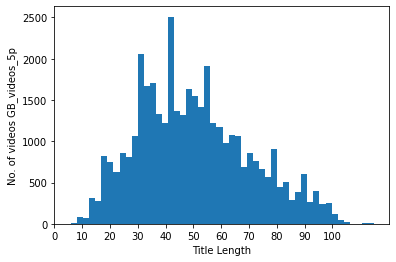

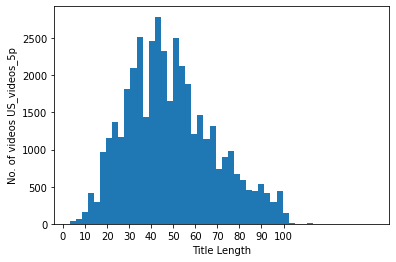

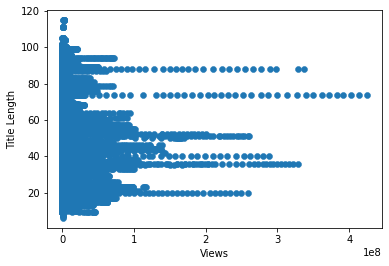

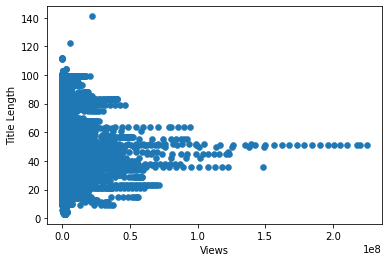

In [0]:
GB_videos_5p["title_length"] = GB_videos_5p["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(GB_videos_5p["title_length"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos GB_videos_5p", xticks=range(0, 110, 10))

US_videos_5p["title_length"] = US_videos_5p["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = sns.distplot(US_videos_5p["title_length"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos US_videos_5p", xticks=range(0, 110, 10))

fig, ax = plt.subplots()
_ = ax.scatter(x=GB_videos_5p['views'], y=GB_videos_5p['title_length'], linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

fig, ax = plt.subplots()
_ = ax.scatter(x=US_videos_5p['views'], y=US_videos_5p['title_length'], linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

1. Mediana wyświetleń to 681 861, a średnia 2 360 785, czyli znaczna większość filmów ma dużo mniej wyświetleń niż średnia. Wniosek: po przejściu pewnej granicy wyświetleń ich liczba znacznie wzrasta. Liczba wyświetleń rośnie nieproporcjonalnie do popularności. 
2. Podobna sytuacja jest przy komentarzach. Niektóre filmy są dużo chętniej komentowane. Podobnie przy polubieniach.
3. Wbrew pozorom popularności hejtów, średnio "łapek w górę" jest 20 razy więcej niż w dół.

new_date_GB publish date range:
            publish_date publish_time
video_id                             
Fkwkn7vXpWI   2017-11-09     10:00:00
Plh2sfrbdlc   2017-11-03     16:16:41
7DLKv39MLbg   2017-11-03     14:56:32
OXZQ5DfSAAc   2017-11-01     16:40:51
xq9FgX_mXiE   2017-11-01     05:59:58
...                  ...          ...
SQmOaJciI7Q   2018-06-07     19:00:14
8JnfIa84TnU   2018-05-31     09:00:13
T3zm1_JSPOQ   2018-05-31     16:07:53
X1VzzNbfPaM   2018-05-23     15:00:02
IP8k2xkhOdI   2018-05-11     17:09:16

[1317 rows x 2 columns]
new_date_US publish date range:
            publish_date publish_time
video_id                             
kgaO45SyaO4   2017-11-13     20:09:58
9XSULcLI6Hg   2017-11-12     15:24:29
wnwF1FHybDQ   2017-11-10     11:00:04
X7flefV8tec   2017-11-09     02:37:49
fIQ2Ty2OL34   2017-11-10     04:00:52
...                  ...          ...
J2HytHu5VBI   2018-06-05     04:54:35
2wJESCSvFU8   2018-06-04     12:00:00
3uGIEY7tdg8   2018-06-04     13:00:02

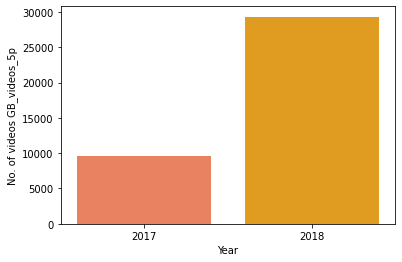

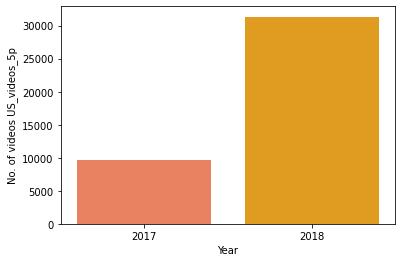

In [0]:
# date analysis

# GB_videos_5p
new_date_GB = GB_videos_5p.copy()
new_date_GB['trending_date'] = pd.to_datetime(GB_videos_5p['trending_date'],errors='coerce', format='%y.%d.%m')
new_date_GB['publish_time'] = pd.to_datetime(GB_videos_5p['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

new_date_GB = new_date_GB[new_date_GB['trending_date'].notnull()]
new_date_GB = new_date_GB[new_date_GB['publish_time'].notnull()]

new_date_GB = new_date_GB.dropna(how='any',inplace=False, axis = 0)

new_date_GB.insert(4, 'publish_date', new_date_GB['publish_time'].dt.date)
new_date_GB['publish_time'] = new_date_GB['publish_time'].dt.time

new_date_GB_full = new_date_GB.reset_index().sort_values('trending_date').set_index('video_id')
new_date_GB = new_date_GB.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
print('new_date_GB publish date range:')
print(new_date_GB[['publish_date','publish_time']])

cdf = GB_videos_5p["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos GB_videos_5p")

# US_videos_5p
new_date_US = US_videos_5p.copy()
new_date_US['trending_date'] = pd.to_datetime(new_date_US['trending_date'],errors='coerce', format='%y.%d.%m')
new_date_US['publish_time'] = pd.to_datetime(new_date_US['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

new_date_US = new_date_US[new_date_US['trending_date'].notnull()]
new_date_US = new_date_US[new_date_US['publish_time'].notnull()]

new_date_US = new_date_US.dropna(how='any',inplace=False, axis = 0)

new_date_US.insert(4, 'publish_date', new_date_US['publish_time'].dt.date)
new_date_US['publish_time'] = new_date_US['publish_time'].dt.time

new_date_US_full = new_date_US.reset_index().sort_values('trending_date').set_index('video_id')
new_date_US = new_date_US.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
print('new_date_US publish date range:')
print(new_date_US[['publish_date','publish_time']])

cdf = US_videos_5p["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos US_videos_5p")

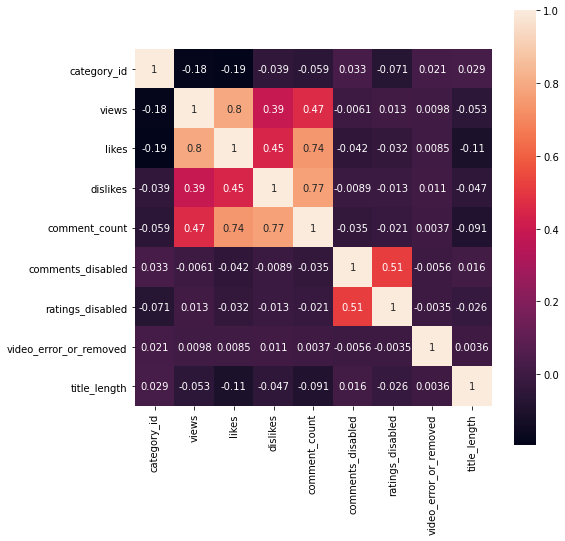

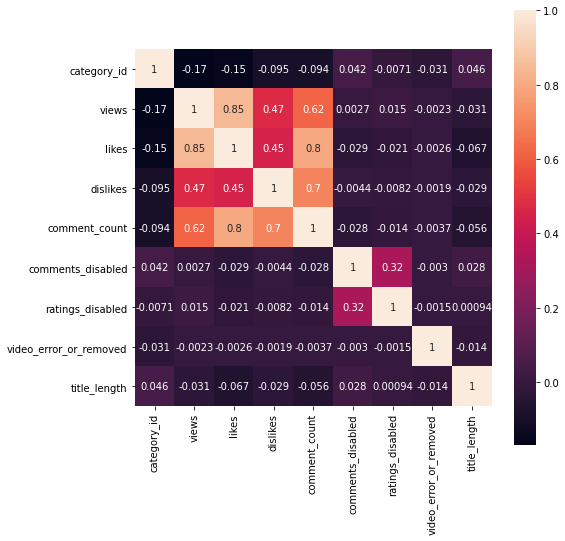

In [0]:
column_names = ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'title_length']

f, ax = plt.subplots(figsize=(8, 8))
corr = GB_videos_5p[column_names].corr()
sns.heatmap(corr, mask=np.zeros_like(GB_videos_5p.corr(), dtype=np.bool),
            square=True, ax=ax,annot=True)

f, ax = plt.subplots(figsize=(8, 8))
corr = US_videos_5p[column_names].corr()
sns.heatmap(corr, mask=np.zeros_like(US_videos_5p.corr(), dtype=np.bool),
            square=True, ax=ax,annot=True)


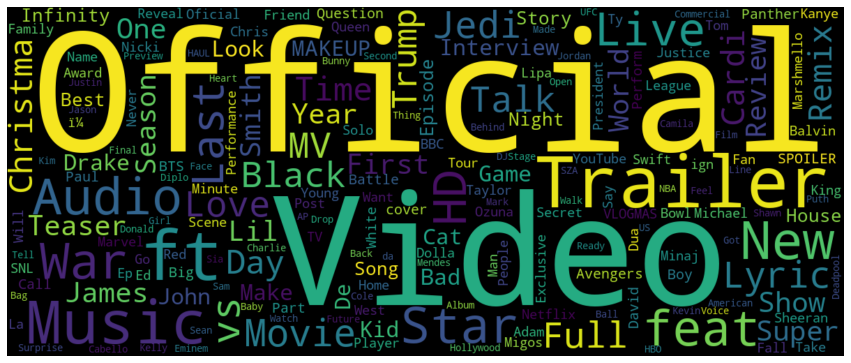

In [0]:
from wordcloud import wordcloud
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False).generate(" ".join(list(GB_videos_5p['title'])))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")